In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Import dataset

In [22]:
PATH = "../data/raw/get_around_delay_analysis.csv"
df = pd.read_csv(PATH)

In [23]:
df.head()

,Unnamed: 0,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,2,508131,359049,connect,ended,70.0,NaN,NaN
3,3,508865,299063,connect,canceled,NaN,NaN,NaN
4,4,511440,313932,mobile,ended,NaN,NaN,NaN


In [24]:
df.shape

(21310, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  21310 non-null  int64  
 1   rental_id                                   21310 non-null  int64  
 2   car_id                                      21310 non-null  int64  
 3   checkin_type                                21310 non-null  object 
 4   state                                       21310 non-null  object 
 5   delay_at_checkout_in_minutes                16346 non-null  float64
 6   previous_ended_rental_id                    1841 non-null   float64
 7   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.3+ MB


In [26]:
df.describe(include="all")

,Unnamed: 0,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,10654.500000,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,6151.811454,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,0.000000,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,5327.250000,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,10654.500000,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,15981.750000,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


## Vue générale

In [27]:
# Nombre de  valeurs manquantes
valeurs_manquantes = df.isna().sum()
valeurs_manquantes

Unnamed: 0                                        0
rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

In [28]:
# Pourcentage de valeurs manquantes
valeurs_manquantes_pourcent = (df.isna().sum() / df.shape[0]) * 100
valeurs_manquantes_pourcent

Unnamed: 0                                     0.000000
rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

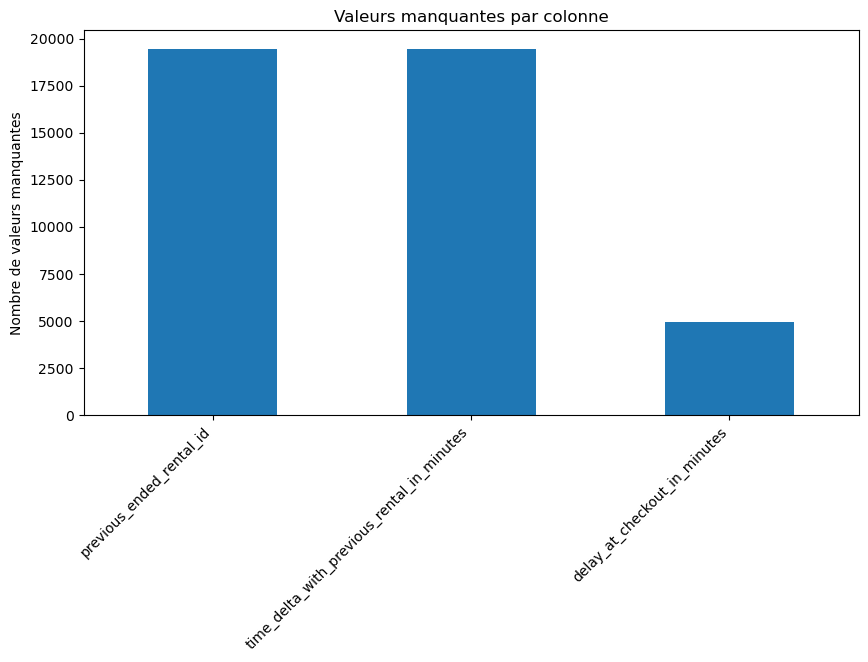

In [29]:
valeurs_manquantes_graph = valeurs_manquantes[valeurs_manquantes > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
# Prise en charge si valeurs manquetes à 0
if valeurs_manquantes_graph.empty:
    ax = plt.gca()
    ax.text(0.5, 0.5, "Aucune valeur manquante",
            ha="center", va="center", fontsize=12)
    ax.axis("off")
else:
    valeurs_manquantes_graph.plot(kind="bar")
    plt.title("Valeurs manquantes par colonne")
    plt.ylabel("Nombre de valeurs manquantes")
    plt.xticks(rotation=45, ha="right")

plt.show()

# Preprocessing

In [30]:
# Périmètre principal
df = df[df["state"] == "ended"].copy()

# Nettoyage minimal
df["checkin_type"] = df["checkin_type"].astype(str).str.strip().str.lower()
df["delay"] = pd.to_numeric(df["delay_at_checkout_in_minutes"], errors="coerce")
df["gap"] = pd.to_numeric(df["time_delta_with_previous_rental_in_minutes"], errors="coerce")

df.head()



,Unnamed: 0,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay,gap
1,1,507750,269550,mobile,ended,-81.0,NaN,NaN,-81.0,NaN
2,2,508131,359049,connect,ended,70.0,NaN,NaN,70.0,NaN
4,4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,NaN
5,5,511626,398802,mobile,ended,-203.0,NaN,NaN,-203.0,NaN
6,6,511639,370585,connect,ended,-15.0,563782.0,570.0,-15.0,570.0


# EDA

## Distribution des retards

La majorité des checkouts est proche de l’heure prévue (pic autour de 0), mais une minorité génère des retards importants (valeurs à droite du graphique) susceptibles d’impacter la location suivante.

In [31]:
cap = 600
df_plot = df[df["delay"].between(-cap, cap)].copy()

fig = px.histogram(df_plot, x="delay", nbins=80,
                   title=f"Distribution des retards (filtrée à ±{cap} min)",
                   labels={"delay": "Retard checkout (min)"})
fig.show()

## Proportion de retards impactant la location suivante

- Sur les locations pour lesquelles le gap (temps entre deux réservations) est renseigné, 17,8% présentent un retard de "checkout" suffisamment important pour dépasser ce gap et impacter potentiellement la location suivante. 

- En se limitant aux seules locations en retard (delay > 0), cette proportion monte à 33,7% : autrement dit, environ 1 retard sur 3 n’est pas absorbé par une "buffer" et peut générer de la friction en chaîne sur les locations suivantes.

In [32]:
chain = df.dropna(subset=["gap", "delay"]).copy()

chain["delay_pos"] = chain["delay"].clip(lower=0)
chain["impact_next"] = chain["delay_pos"] > chain["gap"]
chain["is_late"] = chain["delay"] > 0

# Global
impact_rate_all = chain["impact_next"].mean()*100
impact_rate_among_late = chain.loc[chain["is_late"], "impact_next"].mean()*100

impact_rate_all, impact_rate_among_late

(17.82178217821782, 33.66583541147132)

In [33]:
impact_flow = (
    chain.groupby("checkin_type")
         .agg(
             n=("impact_next", "size"),
             impact_rate_all=("impact_next", "mean"),
             impact_rate_among_late=("impact_next", lambda s: 0.0)  # placeholder
         )
         .reset_index()
)

# among late (simple, lisible)
rows = []
for flow, g in chain.groupby("checkin_type"):
    rows.append({
        "checkin_type": flow,
        "impact_rate_among_late": g.loc[g["is_late"], "impact_next"].mean()
    })
tmp = pd.DataFrame(rows)

impact_flow = impact_flow.drop(columns=["impact_rate_among_late"]).merge(tmp, on="checkin_type")
impact_flow["impact_rate_all"] *= 100
impact_flow["impact_rate_among_late"] *= 100

impact_flow


,checkin_type,n,impact_rate_all,impact_rate_among_late
0,connect,661,12.102874,28.985507
1,mobile,854,22.248244,36.121673


- On observe que le Mobile présente un risque plus élevé que Connect : environ 22% des locations (dont le gap est connu) impactent la suivante en Mobile contre 12% en Connect, et parmi les seuls retards (delay>0) on monte à 36% en Mobile vs 29% en Connect. 

- En pratique, cela pourrait signifier que les retards en Mobile sont plus souvent "non absorbés" par la marge de sécurité et donc surveiller/prioriser ce flux dans la l'analyse des seuils.

In [34]:
plot_df = impact_flow.melt(id_vars=["checkin_type", "n"],
                           value_vars=["impact_rate_all", "impact_rate_among_late"],
                           var_name="metric", value_name="rate")

fig = px.bar(plot_df, x="checkin_type", y="rate", color="metric", barmode="group",
             title="Impact sur la location suivante (%)",
             labels={"checkin_type": "Flow", "rate": "Taux (%)", "metric": ""})
fig.show()

## Simulation par seuil (threshold)

### Pour chaque T, combien de cas problématiques sont résolus ?

In [35]:
thresholds = [0, 15, 30, 45, 60, 90, 120]

chain["problematic"] = chain["impact_next"]
n_problematic = chain["problematic"].sum()

res = []
for T in thresholds:
    affected = chain["gap"] < T
    solved = chain["problematic"] & affected
    res.append({
        "scope": "all",
        "T": T,
        "pct_affected": affected.mean()*100,
        "pct_solved_of_problematic": (solved.sum()/n_problematic*100) if n_problematic else None
    })

sim_all = pd.DataFrame(res)
sim_all

,scope,T,pct_affected,pct_solved_of_problematic
0,all,0,0.000000,0.000000
1,all,15,14.983498,50.370370
2,all,30,14.983498,50.370370
3,all,45,22.112211,65.185185
4,all,60,22.112211,65.185185
5,all,90,31.683168,78.888889
6,all,120,36.501650,82.962963


### Pour chaque T, combien de locations (proxy revenu) sont perdues ?

In [36]:
res = []
for T in thresholds:
    affected = chain["gap"] < T
    res.append({
        "T": T,
        "n_affected": int(affected.sum()),
        "pct_affected": affected.mean()*100
    })
lost = pd.DataFrame(res)
lost

,T,n_affected,pct_affected
0,0,0,0.000000
1,15,227,14.983498
2,30,227,14.983498
3,45,335,22.112211
4,60,335,22.112211
5,90,480,31.683168
6,120,553,36.501650


Interprétation de la visualisation : 
- Axe X (T min) : le temps tampon minimum imposé entre deux locations (0, 15, 30, 45, 60, 90, 120…).
- Axe Y (% résolus) : la part des cas problématiques (retard > gap, donc impact sur la location suivante)
- quand T augmente, un plus grand nombre de situations à risque sont couvertes : le % résolus monte, mais avec des rendements décroissants (plafonnement).


In [37]:
fig = px.line(sim_all, x="T", y="pct_solved_of_problematic", markers=True,
              title="% de cas problématiques résolus",
              labels={"T": "T (min)", "pct_solved_of_problematic": "% résolus"})
fig.show()


Interprétation de la visualisation : 
- Axe X (T min) : le temps tampon minimum imposé entre deux locations (0, 15, 30, 45, 60, 90, 120…).
- Axe Y (% affectées) : la part de locations qui deviendraient non bookables / replanifiées car leur gap est inférieur à T.
- Plus T augmente, plus on "bloque" de locations : le coût business est augmenté.

In [38]:
fig = px.line(lost, x="T", y="pct_affected", markers=True,
              title="% de locations affectées (coût business)",
              labels={"T": "T (min)", "pct_affected": "% affectées"})
fig.show()

## All vs Connect : concentration du risque

### Part et taux de cas problématiques par flux

In [39]:
risk = (
    chain.groupby("checkin_type")
         .agg(
             n=("problematic", "size"),
             n_problematic=("problematic", "sum"),
             problematic_rate=("problematic", "mean")
         )
         .reset_index()
)

risk["problematic_rate"] *= 100
risk["problematic_share"] = risk["n_problematic"] / risk["n_problematic"].sum() * 100
risk   

,checkin_type,n,n_problematic,problematic_rate,problematic_share
0,connect,661,80,12.102874,29.62963
1,mobile,854,190,22.248244,70.37037


In [40]:
thresholds = [0, 15, 30, 45, 60, 90, 120]

n_total_global = len(chain)

# Total problèmes globaux (tous flux)
n_prob_global = int(chain["problematic"].sum())

rows = []
for T in thresholds:
    affected_all = chain["gap"] < T

    # Résolus par flux (volume) = problematic & affected
    for flow, g in chain.groupby("checkin_type"):
        affected_flow = g["gap"] < T
        solved_flow = (g["problematic"] & affected_flow).sum()
        rows.append({
            "T": T,
            "flow": flow,
            "n_solved": int(solved_flow)
        })

solved_by_flow = pd.DataFrame(rows)

# % locations affectées (global)
cost = []
for T in thresholds:
    affected_all = (chain["gap"] < T)
    cost.append({
        "T": T,
        "pct_affected": affected_all.mean() * 100,
        "n_affected": int(affected_all.sum())
    })
cost = pd.DataFrame(cost)

# Barres empilées (volume de problèmes résolus)
fig = px.bar(
    solved_by_flow,
    x="T",
    y="n_solved",
    color="flow",
    title="Cas problématiques résolus (volume) par flux, selon le seuil",
    labels={"T": "T (min)", "n_solved": "Nb de cas résolus", "flow": "Flow"}
)

# Ajout d'une ligne pour le coût (% locations affectées)
fig2 = go.Figure(fig)
fig2.add_trace(go.Scatter(
    x=cost["T"],
    y=cost["pct_affected"],
    mode="lines+markers",
    name="% locations affectées",
    yaxis="y2"
))

fig2.update_layout(
    yaxis2=dict(
        overlaying="y",
        side="right",
        title="% locations affectées"
    )
)
fig2.show()


- La majorité des problèmes résolus vient du flux Mobile, ce qui confirme que Mobile concentre l’essentiel du risque.
- Il existe un compromis clair : Un seuil faible engendre un gain rapide à coût limité, un seuil élevé génère des gains supplémentaires, mais des rendements décroissants.
- Visuellement, le coude se situe autour de 45–60 min : au-delà, la courbe verte monte vite alors que les barres augmentent moins.